<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Kentucky_Hawk_Counts_by_location_in_past_5_years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
! wget ftp://ftpext.usgs.gov/pub/er/md/laurel/BBS/DataFiles/States/Kentuck.zip

--2020-04-03 15:22:03--  ftp://ftpext.usgs.gov/pub/er/md/laurel/BBS/DataFiles/States/Kentuck.zip
           => ‘Kentuck.zip’
Resolving ftpext.usgs.gov (ftpext.usgs.gov)... 137.227.224.199, 2001:49c8:8000:120c::199
Connecting to ftpext.usgs.gov (ftpext.usgs.gov)|137.227.224.199|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/er/md/laurel/BBS/DataFiles/States ... done.
==> SIZE Kentuck.zip ... 884591
==> PASV ... done.    ==> RETR Kentuck.zip ... done.
Length: 884591 (864K) (unauthoritative)

Kentuck.zip         100%[===================>] 863.86K  1.55MB/s    in 0.5s    

2020-04-03 15:22:04 (1.55 MB/s) - ‘Kentuck.zip’ saved [884591]



In [16]:
! unzip Kentuck.zip

Archive:  Kentuck.zip
  inflating: Kentuck.csv             


In [17]:
url = 'Kentuck.csv'
Kentuck_df = pd.read_csv(url)
Kentuck_df.head(3)

,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
0,6167510,840,39,1,101,1966,1310,0,1,0,0,0,1,1
1,6167510,840,39,1,101,1966,2890,0,2,3,8,6,16,19
2,6167510,840,39,1,101,1966,3131,0,0,6,0,0,6,6


In [0]:
# These AOU's correspond to the Cooper's, Red Tail, and the Red Shouldered
Kentucky_hawks_all_yrs = Kentuck_df[(Kentuck_df.AOU == 3330) | (Kentuck_df.AOU == 3370) | (Kentuck_df.AOU == 3390)]

In [19]:
# Should be 1368 = 738 + 219 + 411 (got these totals from the other project where I seperated them individually)
Kentucky_hawks_all_yrs.shape

(1368, 14)

In [20]:
# Checking the year datatype
Kentucky_hawks_all_yrs["Year"].dtype

dtype('int64')

In [0]:
# Filtering for the past most recent 5 years
kent_hawk_recent = Kentucky_hawks_all_yrs["Year"] >= 2014

In [0]:
# Finalizing the dataframe
total_recent_df = Kentucky_hawks_all_yrs[kent_hawk_recent]

In [23]:
# Checking the shape should be 225
total_recent_df.shape

(225, 14)

In [24]:
# Just seeing how many species there would be
# Should b 505
total_recent_df['SpeciesTotal'].sum(axis=0)

505

In [25]:
# Should be 225 total if all added up
# 43, 35, 43, 48, 56
print((total_recent_df['Year'] ==2014).sum(axis=0))
print((total_recent_df['Year'] == 2015).sum(axis=0))
print((total_recent_df['Year'] == 2016).sum(axis=0))
print((total_recent_df['Year'] == 2017).sum(axis=0))
print((total_recent_df['Year'] == 2018).sum(axis=0))

43
35
43
48
56


In [26]:
# Checking the counts for each route
total_recent_df['Route'].value_counts()

3      12
2      10
36      9
25      9
132     9
112     9
4       8
44      8
10      7
107     7
21      7
35      7
6       7
137     7
146     6
8       6
127     6
9       6
22      5
31      5
1       5
134     5
43      5
118     5
120     5
117     4
124     4
30      4
29      4
28      4
5       4
119     4
41      3
23      3
133     3
145     2
39      2
11      2
40      2
42      2
26      2
900     1
Name: Route, dtype: int64

In [0]:
# sorting by route number
total_recent_df = total_recent_df.sort_values(by='Route', ascending=True)

In [0]:
# Have to reset index on new df
total_recent_df = total_recent_df.reset_index(drop=True)

In [0]:
# This makes the index a column which I'll need later for my for loop
total_recent_df.reset_index(level=0, inplace=True)

In [30]:
total_recent_df.head(3)

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
0,0,6354606,840,39,1,101,2014,3390,0,2,2,2,3,9,9
1,1,6357608,840,39,1,101,2015,3390,0,1,0,0,1,2,2
2,2,6361416,840,39,1,101,2016,3390,1,1,0,2,1,5,5


In [31]:
total_recent_df.tail(3)

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
222,222,6355439,840,39,146,101,2014,3390,0,0,0,1,0,1,1
223,223,6360437,840,39,146,101,2015,3390,0,0,0,0,1,1,1
224,224,6354273,840,39,900,101,2014,3390,1,0,0,0,0,1,1


In [32]:
total_recent_df.head(50)

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
0,0,6354606,840,39,1,101,2014,3390,0,2,2,2,3,9,9
1,1,6357608,840,39,1,101,2015,3390,0,1,0,0,1,2,2
2,2,6361416,840,39,1,101,2016,3390,1,1,0,2,1,5,5
3,3,6369450,840,39,1,101,2018,3370,0,0,0,0,1,1,1
4,4,6369450,840,39,1,101,2018,3390,1,4,0,0,3,6,8
5,5,6367292,840,39,2,101,2018,3390,0,1,2,1,0,3,4
6,6,6363868,840,39,2,101,2017,3390,0,0,1,0,0,1,1
7,7,6363868,840,39,2,101,2017,3370,0,0,0,0,1,1,1
8,8,6360564,840,39,2,101,2016,3390,0,0,1,0,0,1,1
9,9,6360564,840,39,2,101,2016,3370,0,1,0,0,1,2,2


In [33]:
total_recent_df.tail(50)

,index,RouteDataID,CountryNum,StateNum,Route,RPID,Year,AOU,Count10,Count20,Count30,Count40,Count50,StopTotal,SpeciesTotal
175,175,6369610,840,39,119,101,2018,3370,0,0,1,0,1,2,2
176,176,6369610,840,39,119,101,2018,3390,0,0,0,3,2,5,5
177,177,6355015,840,39,120,101,2014,3370,0,0,0,0,1,1,1
178,178,6357292,840,39,120,101,2015,3370,0,0,0,0,1,1,1
179,179,6361056,840,39,120,101,2016,3370,0,0,0,0,1,1,1
180,180,6364072,840,39,120,101,2017,3370,0,2,0,0,0,1,2
181,181,6367822,840,39,120,101,2018,3370,0,1,2,0,2,5,5
182,182,6364247,840,39,124,101,2017,3390,0,0,4,0,1,4,5
183,183,6361731,840,39,124,101,2016,3390,0,0,2,1,1,4,4
184,184,6358189,840,39,124,101,2015,3390,0,0,2,0,0,2,2


In [34]:
total_recent_df['index'].dtype

dtype('int64')

In [35]:
# Creating an empty Dataframe with column names only
count_df = pd.DataFrame(columns=['RouteNum', 'HawkCount'])
count_df

,RouteNum,HawkCount


In [0]:
# adds all the species totals up for each route
x = 1
tot = 0
for ind in total_recent_df.index:
  if (total_recent_df['Route'][ind] == x):
    tot += (total_recent_df['SpeciesTotal'][ind])
  else:
    count_df = count_df.append({'RouteNum': int(x), 'HawkCount': int(tot)}, ignore_index=True)
    tot = 0
    tot += (total_recent_df['SpeciesTotal'][ind])
    x = (total_recent_df['Route'][ind])
    if (total_recent_df['Route'][ind] == 900):
      count_df = count_df.append({'RouteNum': int(x), 'HawkCount': int(tot)}, ignore_index=True)
      break

In [37]:
# 1 = 25
# 2 = 21
# 5 = 13
# 6 = 13
# 120 = 10
# 124 = 13
# 127 = 12
# 132 = 16
# 146 = 10
count_df.head(50)

,RouteNum,HawkCount
0,1,25
1,2,21
2,3,34
3,4,19
4,5,13
5,6,13
6,8,10
7,9,12
8,10,10
9,11,2


In [0]:
count_df.rename(columns={'RouteNum': 'Route'}, inplace=True)

In [39]:
count_df.head()

,Route,HawkCount
0,1,25
1,2,21
2,3,34
3,4,19
4,5,13


In [40]:
count_df.shape

(42, 2)

In [41]:
# Get Routes data
! wget ftp://ftpext.usgs.gov/pub/er/md/laurel/BBS/DataFiles/routes.zip

--2020-04-03 15:22:58--  ftp://ftpext.usgs.gov/pub/er/md/laurel/BBS/DataFiles/routes.zip
           => ‘routes.zip’
Resolving ftpext.usgs.gov (ftpext.usgs.gov)... 137.227.224.199, 2001:49c8:8000:120c::199
Connecting to ftpext.usgs.gov (ftpext.usgs.gov)|137.227.224.199|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/er/md/laurel/BBS/DataFiles ... done.
==> SIZE routes.zip ... 120576
==> PASV ... done.    ==> RETR routes.zip ... done.
Length: 120576 (118K) (unauthoritative)

routes.zip          100%[===================>] 117.75K   340KB/s    in 0.3s    

2020-04-03 15:23:00 (340 KB/s) - ‘routes.zip’ saved [120576]



In [42]:
! unzip routes.zip

Archive:  routes.zip
  inflating: routes.csv              


In [43]:
url2 = 'routes.csv'
routes_df = pd.read_csv(url2, encoding='latin-1')
routes_df.sample(3)

,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID
1025,840,14,352,STATEN IS.,1,38.123194,-121.525076,91,32,1,1
1546,840,33,204,JOEL,1,46.447022,-116.839148,65,9,1,1
5608,840,92,57,ANCHOR,1,43.707861,-108.715019,86,10,1,1


In [0]:
kentucky_routes = routes_df[(routes_df.StateNum == 39)]

In [45]:
# should be 65
kentucky_routes.shape

(65, 11)

In [0]:
sorted_kent_routes = kentucky_routes.sort_values(by='Route', ascending=True)

In [0]:
sorted_kent_routes = sorted_kent_routes.reset_index(drop=True)

In [0]:
sorted_kent_routes.reset_index(level=0, inplace=True)

In [49]:
sorted_kent_routes.head(50)

,index,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID
0,0,840,39,1,CUMBERLND GP,1,36.608286,-83.701798,21,28,1,1
1,1,840,39,2,LOVELACEVILE,1,36.906838,-88.862264,4,27,1,1
2,2,840,39,3,SHILOH,1,36.689627,-88.180876,4,27,1,1
3,3,840,39,4,CANTON,1,36.792622,-87.960586,14,24,1,1
4,4,840,39,5,KEYSBURG,1,36.664255,-87.008871,14,24,1,1
5,5,840,39,6,CEDAR GROVE,1,36.990747,-86.631415,14,24,1,1
6,6,840,39,7,IRON BRIDGE,0,36.933609,-86.204147,14,24,1,1
7,7,840,39,8,SULPHUR LICK,1,36.819438,-85.716996,14,24,1,1
8,8,840,39,9,HEGIRA,1,36.700781,-85.269936,14,24,1,1
9,9,840,39,10,SUNNYBROOK,1,36.617158,-84.993388,14,28,1,1


In [50]:
sorted_kent_routes['Route'].dtype

dtype('int64')

In [0]:
my_array = []

In [0]:
# gets the array numbers that I need for the Routes I need 
for ind in count_df.index:
  my_array.append(count_df['Route'][ind])

In [53]:
print(my_array)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 21, 22, 23, 25, 26, 28, 29, 30, 31, 35, 36, 39, 40, 41, 42, 43, 44, 107, 112, 117, 118, 119, 120, 124, 127, 132, 133, 134, 137, 145, 146, 900]


In [54]:
# should be 42
len(my_array)

42

In [55]:
# should be 65
len(sorted_kent_routes)

65

In [56]:
sorted_kent_routes['Route'].dtype

dtype('int64')

In [57]:
type(my_array)

list

In [0]:
booleans = []

In [0]:
x = 0

In [0]:
# uses a list of booleans to seperate out all the data I need for Kentucky routes I need
for ind in sorted_kent_routes.index:
  if x == 42:
    booleans.append(False)
  elif (sorted_kent_routes['Route'][ind] == my_array[x]):
    booleans.append(True)
    x += 1
  else:
    booleans.append(False)

In [61]:
# should be 65
len(booleans)

65

In [62]:
print(booleans)

[True, True, True, True, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, False, True, True, True, True, False, False, False, True, True, False, False, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False]


In [0]:
is_true_route = pd.Series(booleans)

In [0]:
df = sorted_kent_routes[is_true_route]

In [65]:
df.shape

(42, 12)

In [66]:
df.head(50)

,index,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID
0,0,840,39,1,CUMBERLND GP,1,36.608286,-83.701798,21,28,1,1
1,1,840,39,2,LOVELACEVILE,1,36.906838,-88.862264,4,27,1,1
2,2,840,39,3,SHILOH,1,36.689627,-88.180876,4,27,1,1
3,3,840,39,4,CANTON,1,36.792622,-87.960586,14,24,1,1
4,4,840,39,5,KEYSBURG,1,36.664255,-87.008871,14,24,1,1
5,5,840,39,6,CEDAR GROVE,1,36.990747,-86.631415,14,24,1,1
7,7,840,39,8,SULPHUR LICK,1,36.819438,-85.716996,14,24,1,1
8,8,840,39,9,HEGIRA,1,36.700781,-85.269936,14,24,1,1
9,9,840,39,10,SUNNYBROOK,1,36.617158,-84.993388,14,28,1,1
10,10,840,39,11,MONTICELLO,1,36.821169,-84.833991,21,28,1,1


In [0]:
# 1 = 25
# 2 = 21
# 5 = 13
# 6 = 13
# 120 = 10
# 124 = 13
# 127 = 12
# 132 = 16
# 134 = 26
# 146 = 10
final_df = pd.merge(df, count_df, on=['Route'], how='inner')

In [68]:
final_df

,index,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,HawkCount
0,0,840,39,1,CUMBERLND GP,1,36.608286,-83.701798,21,28,1,1,25
1,1,840,39,2,LOVELACEVILE,1,36.906838,-88.862264,4,27,1,1,21
2,2,840,39,3,SHILOH,1,36.689627,-88.180876,4,27,1,1,34
3,3,840,39,4,CANTON,1,36.792622,-87.960586,14,24,1,1,19
4,4,840,39,5,KEYSBURG,1,36.664255,-87.008871,14,24,1,1,13
5,5,840,39,6,CEDAR GROVE,1,36.990747,-86.631415,14,24,1,1,13
6,7,840,39,8,SULPHUR LICK,1,36.819438,-85.716996,14,24,1,1,10
7,8,840,39,9,HEGIRA,1,36.700781,-85.269936,14,24,1,1,12
8,9,840,39,10,SUNNYBROOK,1,36.617158,-84.993388,14,28,1,1,10
9,10,840,39,11,MONTICELLO,1,36.821169,-84.833991,21,28,1,1,2


In [0]:
finished_df = final_df

In [0]:
# makes new index a column important for loop
finished_df.reset_index(level=0, inplace=True)

In [0]:
finished_df = finished_df.drop(['level_0'], axis=1)

In [0]:
finished_df.drop(finished_df.index[32], inplace=True)

In [0]:
finished_df.at[34, 'HawkCount'] = 12

In [0]:
finished_df.reset_index(inplace=True)

In [0]:
finished_df = finished_df.drop(['level_0'], axis=1)

In [0]:
finished_df.at[34, 'HawkCount'] = 26

In [0]:
finished_df.at[34, 'RouteName'] = 'River Queen / Million 2'

In [0]:
finished_df.at[38, 'RouteName'] = 'Carter / Kehoe 2'

In [0]:
finished_df.at[39, 'RouteName'] = ''

In [0]:
finished_df = finished_df.drop(['index'], axis=1)

In [0]:
finished_df['RouteName'] = finished_df['RouteName'].str.upper()

In [0]:
finished_df.at[38, 'RouteName'] = 'Carter / Kehoe 2'

In [156]:
# 1 = 25
# 2 = 21
# 5 = 13
# 6 = 13
# 120 = 10
# 124 = 13
# 127 = 12
# 132 = 16
# 134 = 26
# 146 = 10
finished_df

,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,HawkCount,geometry
0,840,39,1,CUMBERLND GP,1,36.608286,-83.701798,21,28,1,1,25,POINT (-83.70180 36.60829)
1,840,39,2,LOVELACEVILE,1,36.906838,-88.862264,4,27,1,1,21,POINT (-88.86226 36.90684)
2,840,39,3,SHILOH,1,36.689627,-88.180876,4,27,1,1,34,POINT (-88.18088 36.68963)
3,840,39,4,CANTON,1,36.792622,-87.960586,14,24,1,1,19,POINT (-87.96059 36.79262)
4,840,39,5,KEYSBURG,1,36.664255,-87.008871,14,24,1,1,13,POINT (-87.00887 36.66425)
5,840,39,6,CEDAR GROVE,1,36.990747,-86.631415,14,24,1,1,13,POINT (-86.63142 36.99075)
6,840,39,8,SULPHUR LICK,1,36.819438,-85.716996,14,24,1,1,10,POINT (-85.71700 36.81944)
7,840,39,9,HEGIRA,1,36.700781,-85.269936,14,24,1,1,12,POINT (-85.26994 36.70078)
8,840,39,10,SUNNYBROOK,1,36.617158,-84.993388,14,28,1,1,10,POINT (-84.99339 36.61716)
9,840,39,11,MONTICELLO,1,36.821169,-84.833991,21,28,1,1,2,POINT (-84.83399 36.82117)


In [79]:
finished_df.head()

,index,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,HawkCount
0,0,840,39,1,CUMBERLND GP,1,36.608286,-83.701798,21,28,1,1,25
1,1,840,39,2,LOVELACEVILE,1,36.906838,-88.862264,4,27,1,1,21
2,2,840,39,3,SHILOH,1,36.689627,-88.180876,4,27,1,1,34
3,3,840,39,4,CANTON,1,36.792622,-87.960586,14,24,1,1,19
4,4,840,39,5,KEYSBURG,1,36.664255,-87.008871,14,24,1,1,13


In [80]:
finished_df.tail()

,index,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,HawkCount
36,58,840,39,134,APEX,1,37.107084,-87.352588,14,24,1,1,26
37,59,840,39,137,PLEASUREVILL,1,38.269812,-85.204262,15,24,1,1,15
38,60,840,39,145,CARTER,1,38.423575,-83.091989,22,28,1,1,5
39,61,840,39,146,KEHOE 2,1,38.439055,-82.996438,22,28,1,1,10
40,63,840,39,900,MAMMOTH CAVE,0,37.217454,-86.048785,14,24,1,2,1


In [6]:
# install GeoPandas
pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-8g6hpyxo
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-8g6hpyxo
     |████████████████████████████████| 14.7MB 313kB/s 
     |████████████████████████████████| 10.4MB 42.2MB/s 
  Created wheel for geopandas: filename=geopandas-0.7.0+16.g078062d-py2.py3-none-any.whl size=934323 sha256=8c991917eba3e71c303808bad64af23c46523b52a70d0a065bb14da68d3a5fce
  Stored in directory: /tmp/pip-ephem-wheel-cache-ng7f9giu/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [0]:
import geopandas as gpd
from shapely.geometry import Point

In [81]:
! wget https://www2.census.gov/geo/tiger/TIGER2016/COUSUB/tl_2016_21_cousub.zip

--2020-04-03 15:25:36--  https://www2.census.gov/geo/tiger/TIGER2016/COUSUB/tl_2016_21_cousub.zip
Resolving www2.census.gov (www2.census.gov)... 104.69.220.237, 2600:1402:a:292::208c, 2600:1402:a:2a6::208c, ...
Connecting to www2.census.gov (www2.census.gov)|104.69.220.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2016_21_cousub.zip’

tl_2016_21_cousub.z     [         <=>        ]   8.85M  5.27MB/s    in 1.7s    

2020-04-03 15:25:38 (5.27 MB/s) - ‘tl_2016_21_cousub.zip’ saved [9283127]



In [82]:
! wget https://www2.census.gov/geo/tiger/TIGER2016/TRACT/tl_2016_21_tract.zip

--2020-04-03 15:25:41--  https://www2.census.gov/geo/tiger/TIGER2016/TRACT/tl_2016_21_tract.zip
Resolving www2.census.gov (www2.census.gov)... 104.69.220.237, 2600:1402:a:2a6::208c, 2600:1402:a:282::208c
Connecting to www2.census.gov (www2.census.gov)|104.69.220.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2016_21_tract.zip’

tl_2016_21_tract.zi     [     <=>            ]  10.98M  12.5MB/s    in 0.9s    

2020-04-03 15:25:43 (12.5 MB/s) - ‘tl_2016_21_tract.zip’ saved [11518828]



In [83]:
! unzip tl_2016_21_cousub.zip

Archive:  tl_2016_21_cousub.zip
 extracting: tl_2016_21_cousub.cpg   
  inflating: tl_2016_21_cousub.dbf   
  inflating: tl_2016_21_cousub.prj   
  inflating: tl_2016_21_cousub.shp   
  inflating: tl_2016_21_cousub.shp.ea.iso.xml  
  inflating: tl_2016_21_cousub.shp.iso.xml  
  inflating: tl_2016_21_cousub.shp.xml  
  inflating: tl_2016_21_cousub.shx   


In [84]:
! unzip tl_2016_21_tract.zip

Archive:  tl_2016_21_tract.zip
 extracting: tl_2016_21_tract.cpg    
  inflating: tl_2016_21_tract.dbf    
  inflating: tl_2016_21_tract.prj    
  inflating: tl_2016_21_tract.shp    
  inflating: tl_2016_21_tract.shp.ea.iso.xml  
  inflating: tl_2016_21_tract.shp.iso.xml  
  inflating: tl_2016_21_tract.shp.xml  
  inflating: tl_2016_21_tract.shx    


In [0]:
# import ky map
kentucky_map = gpd.read_file("tl_2016_21_cousub.shp")

In [0]:
# import ky map
kentucky_map2 = gpd.read_file("tl_2016_21_tract.shp")

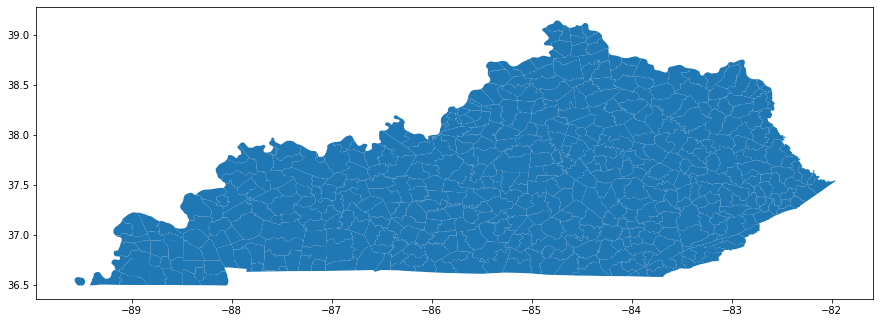

In [87]:
fig, ax = plt.subplots(figsize = (15,15))
kentucky_map.plot(ax = ax)

In [0]:
crs = "EPSG:4326"

In [157]:
geometry = [Point(xy) for xy in zip(finished_df["Longitude"], finished_df["Latitude"])]
geometry[0:3]

In [158]:
geo_df = gpd.GeoDataFrame(finished_df, crs = crs, geometry=geometry)
geo_df.head(3)

,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,HawkCount,geometry
0,840,39,1,CUMBERLND GP,1,36.608286,-83.701798,21,28,1,1,25,POINT (-83.70180 36.60829)
1,840,39,2,LOVELACEVILE,1,36.906838,-88.862264,4,27,1,1,21,POINT (-88.86226 36.90684)
2,840,39,3,SHILOH,1,36.689627,-88.180876,4,27,1,1,34,POINT (-88.18088 36.68963)


In [159]:
geo_df.shape

(41, 13)

In [92]:
geo_df

,index,CountryNum,StateNum,Route,RouteName,Active,Latitude,Longitude,Stratum,BCR,RouteTypeID,RouteTypeDetailID,HawkCount,geometry
0,0,840,39,1,CUMBERLND GP,1,36.608286,-83.701798,21,28,1,1,25,POINT (-83.70180 36.60829)
1,1,840,39,2,LOVELACEVILE,1,36.906838,-88.862264,4,27,1,1,21,POINT (-88.86226 36.90684)
2,2,840,39,3,SHILOH,1,36.689627,-88.180876,4,27,1,1,34,POINT (-88.18088 36.68963)
3,3,840,39,4,CANTON,1,36.792622,-87.960586,14,24,1,1,19,POINT (-87.96059 36.79262)
4,4,840,39,5,KEYSBURG,1,36.664255,-87.008871,14,24,1,1,13,POINT (-87.00887 36.66425)
5,5,840,39,6,CEDAR GROVE,1,36.990747,-86.631415,14,24,1,1,13,POINT (-86.63142 36.99075)
6,7,840,39,8,SULPHUR LICK,1,36.819438,-85.716996,14,24,1,1,10,POINT (-85.71700 36.81944)
7,8,840,39,9,HEGIRA,1,36.700781,-85.269936,14,24,1,1,12,POINT (-85.26994 36.70078)
8,9,840,39,10,SUNNYBROOK,1,36.617158,-84.993388,14,28,1,1,10,POINT (-84.99339 36.61716)
9,10,840,39,11,MONTICELLO,1,36.821169,-84.833991,21,28,1,1,2,POINT (-84.83399 36.82117)


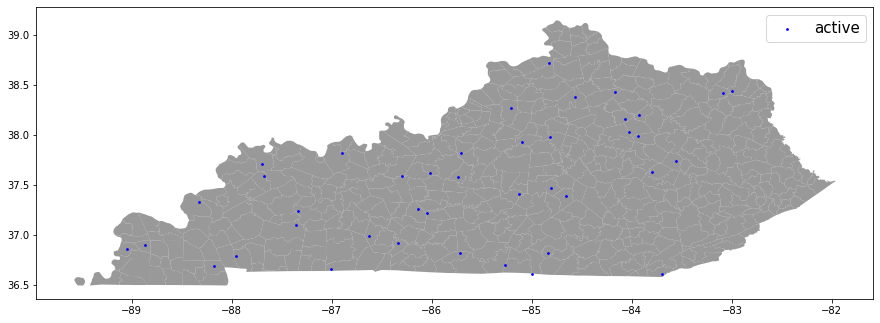

In [93]:
fig, ax = plt.subplots(figsize =(15, 15))
kentucky_map.plot(ax = ax, alpha = 0.8, color="grey")
geo_df.plot(ax = ax, markersize= 3, color='blue', marker="o", label = "active")
plt.legend(prop={"size":15})

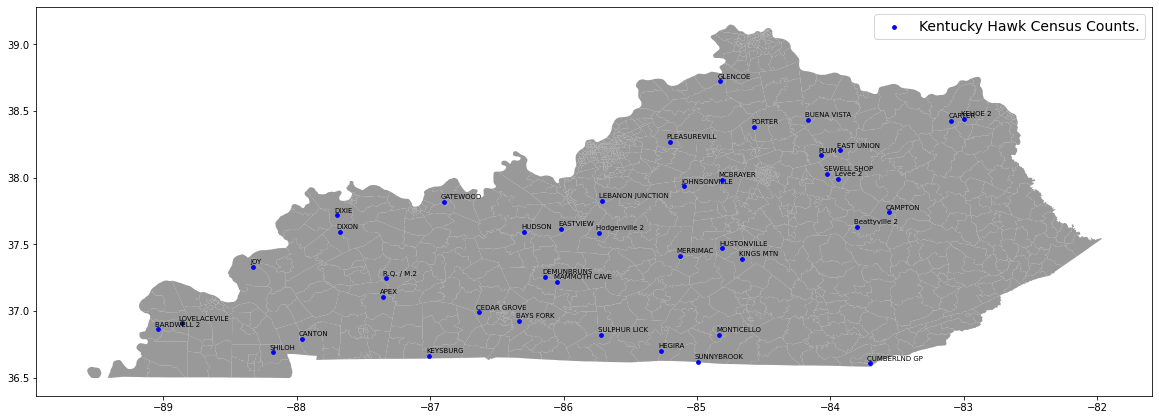

In [94]:
fig, ax = plt.subplots(figsize =(20, 20))
kentucky_map2.plot(ax = ax, alpha = 0.8, color="grey")
geo_df.plot(ax = ax, markersize= 14, color='blue', marker="o", label = "Kentucky Hawk Census Counts.")
plt.legend(prop={"size":14})
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.RouteName):
    ax.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords="offset points", size = 7)

In [0]:
route_array = []

In [0]:
# gets the array numbers that I need for the Routes I need 
for ind in geo_df.index:
  route_array.append(str(geo_df['RouteName'][ind]) + "  " + str(geo_df['HawkCount'][ind]))

In [97]:
print(route_array)

['CUMBERLND GP  25', 'LOVELACEVILE  21', 'SHILOH  34', 'CANTON  19', 'KEYSBURG  13', 'CEDAR GROVE  13', 'SULPHUR LICK  10', 'HEGIRA  12', 'SUNNYBROOK  10', 'MONTICELLO  2', 'KINGS MTN  9', 'HUSTONVILLE  6', 'MCBRAYER  6', 'MERRIMAC  14', 'JOHNSONVILLE  2', 'DEMUNBRUNS  6', 'GATEWOOD  11', 'HUDSON  4', 'EASTVIEW  18', 'DIXIE  21', 'JOY  25', 'GLENCOE  2', 'BUENA VISTA  2', 'PORTER  8', 'SEWELL SHOP  2', 'PLUM  5', 'EAST UNION  28', 'BAYS FORK  17', 'BARDWELL 2  16', 'CAMPTON  9', 'Beattyville 2  8', 'Levee 2  12', 'Hodgenville 2  13', 'LEBANON JUNCTION  12', 'R.Q. / M.2  26', 'DIXON  7', 'APEX  26', 'PLEASUREVILL  15', 'CARTER  5', 'KEHOE 2  10', 'MAMMOTH CAVE  1']


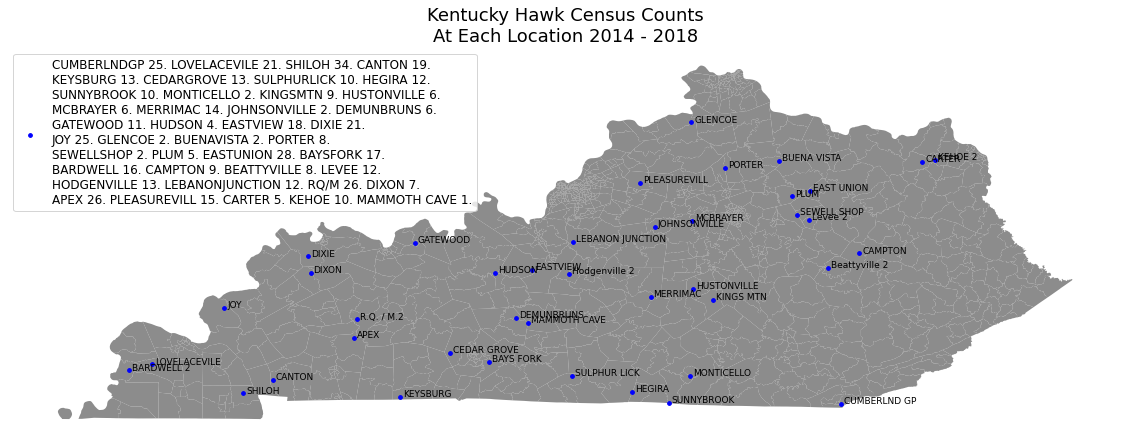

In [98]:
fig, ax = plt.subplots(figsize =(20, 20))
kentucky_map2.plot(ax = ax, alpha = 0.9, color="grey")
geo_df.plot(ax = ax, markersize= 14, color='blue', marker="o")
ax.set_title("Kentucky Hawk Census Counts\nAt Each Location 2014 - 2018", fontsize=18)
ax.axis('off')
ax.legend(['CUMBERLNDGP 25. LOVELACEVILE 21. SHILOH 34. CANTON 19.\nKEYSBURG 13. CEDARGROVE 13. SULPHURLICK 10. HEGIRA 12.\nSUNNYBROOK 10. MONTICELLO 2. KINGSMTN 9. HUSTONVILLE 6.\nMCBRAYER 6. MERRIMAC 14. JOHNSONVILLE 2. DEMUNBRUNS 6.\nGATEWOOD 11. HUDSON 4. EASTVIEW 18. DIXIE 21.\nJOY 25. GLENCOE 2. BUENAVISTA 2. PORTER 8.\nSEWELLSHOP 2. PLUM 5. EASTUNION 28. BAYSFORK 17.\nBARDWELL 16. CAMPTON 9. BEATTYVILLE 8. LEVEE 12.\nHODGENVILLE 13. LEBANONJUNCTION 12. RQ/M 26. DIXON 7.\nAPEX 26. PLEASUREVILL 15. CARTER 5. KEHOE 10. MAMMOTH CAVE 1.'],loc='upper left', fontsize = 12)
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.RouteName):
    ax.annotate(label, xy=(x, y), xytext=(3, 0), textcoords="offset points", size = 9)

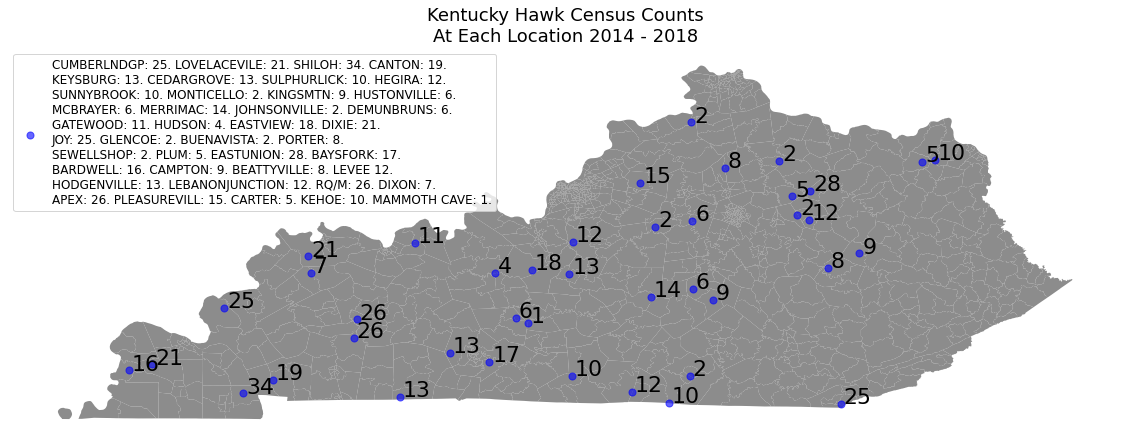

In [99]:

fig, ax = plt.subplots(figsize =(20, 20))
kentucky_map2.plot(ax = ax, alpha = 0.9, color="grey")
geo_df.plot(ax = ax, markersize= 50, color='blue', marker="o", alpha = .6)
ax.set_title("Kentucky Hawk Census Counts\nAt Each Location 2014 - 2018", fontsize=18)
ax.axis('off')
ax.legend(['CUMBERLNDGP: 25. LOVELACEVILE: 21. SHILOH: 34. CANTON: 19.\nKEYSBURG: 13. CEDARGROVE: 13. SULPHURLICK: 10. HEGIRA: 12.\nSUNNYBROOK: 10. MONTICELLO: 2. KINGSMTN: 9. HUSTONVILLE: 6.\nMCBRAYER: 6. MERRIMAC: 14. JOHNSONVILLE: 2. DEMUNBRUNS: 6.\nGATEWOOD: 11. HUDSON: 4. EASTVIEW: 18. DIXIE: 21.\nJOY: 25. GLENCOE: 2. BUENAVISTA: 2. PORTER: 8.\nSEWELLSHOP: 2. PLUM: 5. EASTUNION: 28. BAYSFORK: 17.\nBARDWELL: 16. CAMPTON: 9. BEATTYVILLE: 8. LEVEE 12.\nHODGENVILLE: 13. LEBANONJUNCTION: 12. RQ/M: 26. DIXON: 7.\nAPEX: 26. PLEASUREVILL: 15. CARTER: 5. KEHOE: 10. MAMMOTH CAVE: 1.'],loc='upper left', fontsize = 12)
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.HawkCount):
    ax.annotate(label, xy=(x, y), xytext=(3, 0), textcoords="offset points", size = 22)

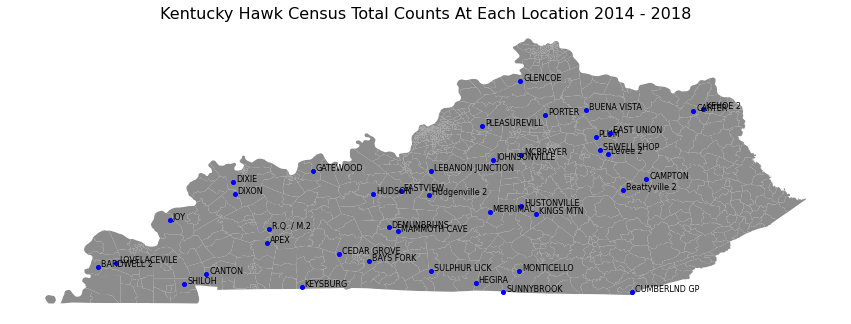

In [100]:
fig, ax = plt.subplots(figsize =(15, 15))
kentucky_map2.plot(ax = ax, alpha = 0.9, color="grey")
geo_df.plot(ax = ax, markersize= 16, color='blue', marker="o")
ax.axis('off')
ax.set_title("Kentucky Hawk Census Total Counts At Each Location 2014 - 2018", fontsize=16)
# ax.legend(['CUMBERLNDGP 25. LOVELACEVILE 21. SHILOH 34. CANTON 19.\nKEYSBURG 13. CEDARGROVE 13. SULPHURLICK 10. HEGIRA 12.\nSUNNYBROOK 10. MONTICELLO 2. KINGSMTN 9. HUSTONVILLE 6.\nMCBRAYER 6. MERRIMAC 14. JOHNSONVILLE 2. DEMUNBRUNS 6.\nGATEWOOD 11. HUDSON 4. EASTVIEW 18. DIXIE 21.\nJOY 25. GLENCOE 2. BUENAVISTA 2. PORTER 8.\nSEWELLSHOP 2. PLUM 5. EASTUNION 28. BAYSFORK 17.\nBARDWELL 16. CAMPTON 9. BEATTYVILLE 8. LEVEE 12.\nHODGENVILLE 13. LEBANONJUNCTION 12. RQ/M 26. DIXON 7.\nAPEX 26. PLEASUREVILL 15. CARTER 5. KEHOE 10. MAMMOTH CAVE 1.'],loc='upper left', fontsize = 10)
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.RouteName):
    ax.annotate(label, xy=(x, y), xytext=(3, 0), textcoords="offset points", size = 8)

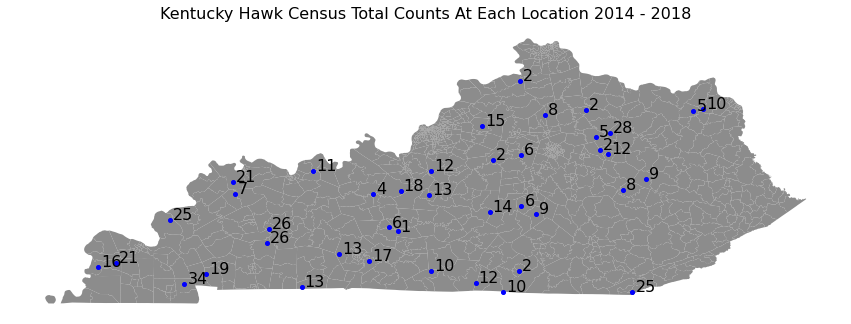

In [101]:
fig, ax = plt.subplots(figsize =(15, 15))
kentucky_map2.plot(ax = ax, alpha = 0.9, color="grey")
geo_df.plot(ax = ax, markersize= 16, color='blue', marker="o")
ax.axis('off')
ax.set_title("Kentucky Hawk Census Total Counts At Each Location 2014 - 2018", fontsize=16)
# ax.legend(['CUMBERLNDGP 25. LOVELACEVILE 21. SHILOH 34. CANTON 19.\nKEYSBURG 13. CEDARGROVE 13. SULPHURLICK 10. HEGIRA 12.\nSUNNYBROOK 10. MONTICELLO 2. KINGSMTN 9. HUSTONVILLE 6.\nMCBRAYER 6. MERRIMAC 14. JOHNSONVILLE 2. DEMUNBRUNS 6.\nGATEWOOD 11. HUDSON 4. EASTVIEW 18. DIXIE 21.\nJOY 25. GLENCOE 2. BUENAVISTA 2. PORTER 8.\nSEWELLSHOP 2. PLUM 5. EASTUNION 28. BAYSFORK 17.\nBARDWELL 16. CAMPTON 9. BEATTYVILLE 8. LEVEE 12.\nHODGENVILLE 13. LEBANONJUNCTION 12. RQ/M 26. DIXON 7.\nAPEX 26. PLEASUREVILL 15. CARTER 5. KEHOE 10. MAMMOTH CAVE 1.'],loc='upper left', fontsize = 10)
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.HawkCount):
    ax.annotate(label, xy=(x, y), xytext=(3, 0), textcoords="offset points", size = 16)

In [0]:
from matplotlib import cm
from collections import OrderedDict
from mpl_toolkits.axes_grid1 import make_axes_locatable

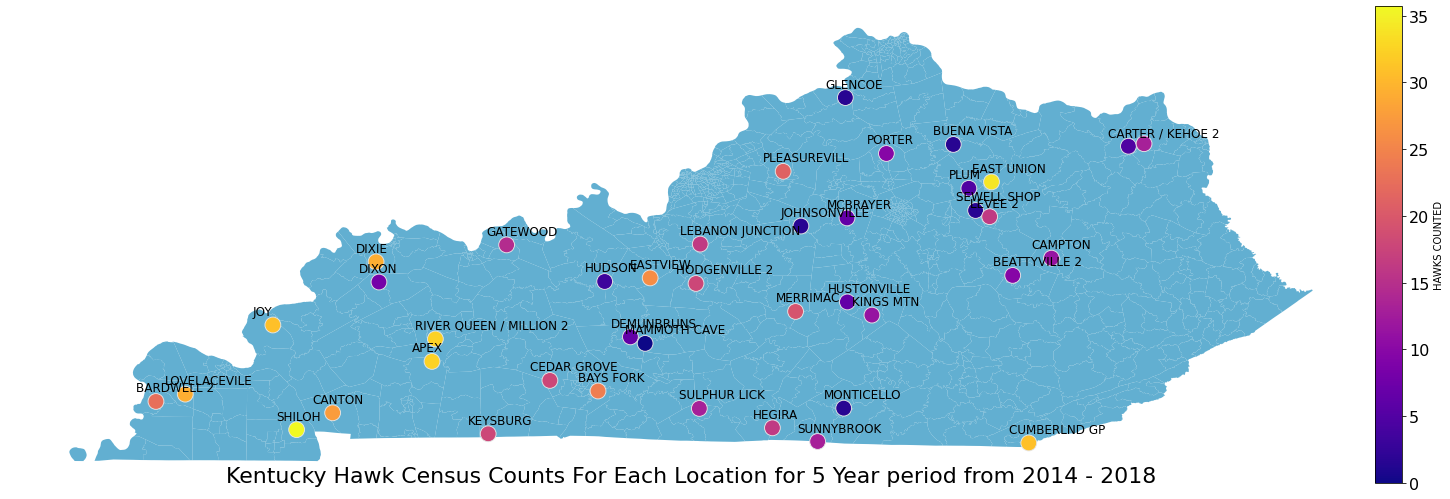

In [249]:
variable = geo_df.HawkCount
# set the range for the choropleth
vmin, vmax = 0, 34
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 25))
ax.axis('off')
ax.set_title("Kentucky Hawk Census Counts For Each Location for 5 Year period from 2014 - 2018", y =-0.01, fontsize=22)
kentucky_map2.plot(ax = ax, alpha = 0.9, color="#52a7cc")
geo_df.plot(column=variable, markersize = 250, cmap = 'plasma', linewidth=0.9, ax=ax, edgecolor='0.9')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0)

cbar = fig.colorbar(cm.ScalarMappable(cmap = 'plasma'), cax = cax, ticks=[0, 0.14, 0.28, 0.42, 0.56, 0.7, 0.84, .98], label = "HAWKS COUNTED")
cbar.ax.set_yticklabels(['0', '5', '10', '15', '20', '25', '30', '35'], fontsize = 16)
for x, y, label in zip(geo_df.geometry.x, geo_df.geometry.y, geo_df.RouteName):
    ax.annotate(label, xy=(x, y), xytext=(-20, 10), textcoords="offset points", size = 12)